In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_rows = 50
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [4]:
df = pd.read_csv('~/downloads/reviews-2.csv', delimiter = ',', header = 0)
df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10291,193728,2011-03-07,384152,Anais,We never made it but Jill called us the night ...
1,10291,720271,2011-11-14,1383115,Keri And Anthony,Jill's place was amazing! Not only did she hel...
2,10291,819616,2012-01-01,1287977,Andre,This New Orleans cottage only fifteen minutes ...
3,10291,830135,2012-01-03,1128663,Ruth And Chris,Jill's house is perfectly located. We could w...
4,10291,851787,2012-01-09,1443994,Annette,I was hesitant to rent Spacious Cottage becaus...
...,...,...,...,...,...,...
351583,43514044,626652489,2020-05-29,128256,Annie+Dan,"Gorgeous place! Spacious, stylish touches, an..."
351584,43524298,627321323,2020-06-01,339184746,Georgianna,Where do I begin..... the house was GORGEOUS! ...
351585,43524298,628338804,2020-06-07,332922282,Josh,Great stay
351586,43544681,627968499,2020-06-06,348694211,Brett,Very very professional understanding and Consi...


In [5]:
df2 = pd.read_csv('~/downloads/listings-2.csv', delimiter = ',', header = 0)
df2

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10291,https://www.airbnb.com/rooms/10291,20200609034906,2020-06-09,Spacious Cottage in Mid-City!,NaN,"Spacious house located in Mid-City, New Orlean...","Spacious house located in Mid-City, New Orlean...",none,Navarre is a quiet and quaint neighborhood tha...,NaN,PARKING: Paritally shared driveway located on ...,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/99566384/f...,NaN,31004,https://www.airbnb.com/users/show/31004,Jill,2009-08-11,"New Orleans, Louisiana, United States",I'm from New Orleans and work in the insurance...,within an hour,100%,73%,t,https://a0.muscache.com/im/pictures/user/36d01...,https://a0.muscache.com/im/pictures/user/36d01...,Navarre,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"New Orleans, LA, United States",Navarre,Navarre,NaN,New Orleans,LA,70124,New Orleans,"New Orleans, LA",US,United States,29.986660,-90.109280,t,Cottage,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$300.00,NaN,NaN,$0.00,$100.00,4,$0.00,2,365,2,2,365,365,2.0,365.0,2 weeks ago,t,21,44,74,312,2020-06-09,123,18,2011-03-07,2020-05-10,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,"19STR-08424, 19-OSTR-0313","{""Louisiana State"","" New Orleans"","" LA""}",f,f,moderate,t,f,1,1,0,0,1.09
1,19091,https://www.airbnb.com/rooms/19091,20200609034906,2020-06-09,Fully Furnished Cozy Apartment,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,SEE SPECIAL REDUCED SUMMER PRICING! This apa...,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,none,"NorthWest Carrollton, where this apartment is ...",NaN,Guests in New Orleans regularly use Lyft or Ub...,Guests who stay for a week or longer will have...,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,No smoking! No drugs. No pets. No loud pa...,NaN,NaN,https://a0.muscache.com/im/pictures/a5fdfd3b-5...,NaN,72880,https://www.airbnb.com/users/show/72880,John,2010-01-23,"New Orleans, Louisiana, United States",I recently (2018) retired as the Director of B...,NaN,NaN,100%,t,https://a0.muscache.com/im/users/72880/profile...,https://a0.muscache.com/im/users/72880/profile...,Riverbend,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"New Orleans, LA, United States",Uptown/Carrollton District,Leonidas,NaN,New Orleans,LA,70118,New

In [6]:
df2.rename(columns = {'id':'listing_id'}, inplace = True)

In [7]:
result = pd.merge(df, df2[['listing_id', 'host_is_superhost', 'neighbourhood_cleansed', 'number_of_reviews']],
on = 'listing_id')

In [8]:
result

,listing_id,id,date,reviewer_id,reviewer_name,comments,host_is_superhost,neighbourhood_cleansed,number_of_reviews
0,10291,193728,2011-03-07,384152,Anais,We never made it but Jill called us the night ...,t,Navarre,123
1,10291,720271,2011-11-14,1383115,Keri And Anthony,Jill's place was amazing! Not only did she hel...,t,Navarre,123
2,10291,819616,2012-01-01,1287977,Andre,This New Orleans cottage only fifteen minutes ...,t,Navarre,123
3,10291,830135,2012-01-03,1128663,Ruth And Chris,Jill's house is perfectly located. We could w...,t,Navarre,123
4,10291,851787,2012-01-09,1443994,Annette,I was hesitant to rent Spacious Cottage becaus...,t,Navarre,123
...,...,...,...,...,...,...,...,...,...
351583,43514044,626652489,2020-05-29,128256,Annie+Dan,"Gorgeous place! Spacious, stylish touches, an...",f,St. Thomas Dev,3
351584,43524298,627321323,2020-06-01,339184746,Georgianna,Where do I begin..... the house was GORGEOUS! ...,f,Treme - Lafitte,2
351585,43524298,628338804,2020-06-07,332922282,Josh,Great stay,f,Treme - Lafitte,2
351586,43544681,627968499,2020-06-06,348694211,Brett,Very very professional understanding and Consi...,f,Central Business District,1


In [9]:
result.to_csv('resultsmerge.csv')

In [10]:
# result = pd.read_csv("resultsmerge.csv", index_col="date", parse_dates=True)


In [11]:
result.drop(result.columns[result.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [12]:
result

,listing_id,id,date,reviewer_id,reviewer_name,comments,host_is_superhost,neighbourhood_cleansed,number_of_reviews
0,10291,193728,2011-03-07,384152,Anais,We never made it but Jill called us the night ...,t,Navarre,123
1,10291,720271,2011-11-14,1383115,Keri And Anthony,Jill's place was amazing! Not only did she hel...,t,Navarre,123
2,10291,819616,2012-01-01,1287977,Andre,This New Orleans cottage only fifteen minutes ...,t,Navarre,123
3,10291,830135,2012-01-03,1128663,Ruth And Chris,Jill's house is perfectly located. We could w...,t,Navarre,123
4,10291,851787,2012-01-09,1443994,Annette,I was hesitant to rent Spacious Cottage becaus...,t,Navarre,123
...,...,...,...,...,...,...,...,...,...
351583,43514044,626652489,2020-05-29,128256,Annie+Dan,"Gorgeous place! Spacious, stylish touches, an...",f,St. Thomas Dev,3
351584,43524298,627321323,2020-06-01,339184746,Georgianna,Where do I begin..... the house was GORGEOUS! ...,f,Treme - Lafitte,2
351585,43524298,628338804,2020-06-07,332922282,Josh,Great stay,f,Treme - Lafitte,2
351586,43544681,627968499,2020-06-06,348694211,Brett,Very very professional understanding and Consi...,f,Central Business District,1


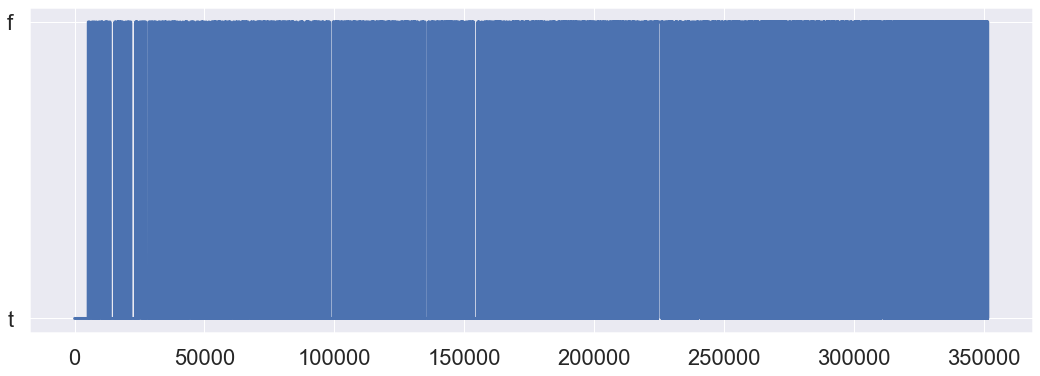

In [80]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(result.host_is_superhost);

In [14]:
import statsmodels.tsa.api as smt

In [15]:
# ϵ, t = smt.filters.hpfilter(result.number_of_reviews, lamb=129600*30)

In [16]:
# start = pd.Timestamp('2010-04-16')
# end = pd.Timestamp('2020-06-08')

# fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(t, linewidth=2, label="Trend")

# ax.fill_between(t.index, t - ϵ, t + ϵ, alpha=.15, color='b')

# ylim = ax.get_ylim()
# ax.fill_between([start, end], *ylim, color='k', alpha=.2)
# ax.set_ylim(*ylim)

# ax.annotate("Housing Bubble", (pd.Timestamp("2010-01"),  255),
#             fontsize=12, color='red')
# ax.annotate("Recession", (pd.Timestamp("2012-01"),  255),
#             fontsize=12, color='red')

# ax.legend()
# sns.despine()

In [17]:
# result.number_of_reviews.plot.area();

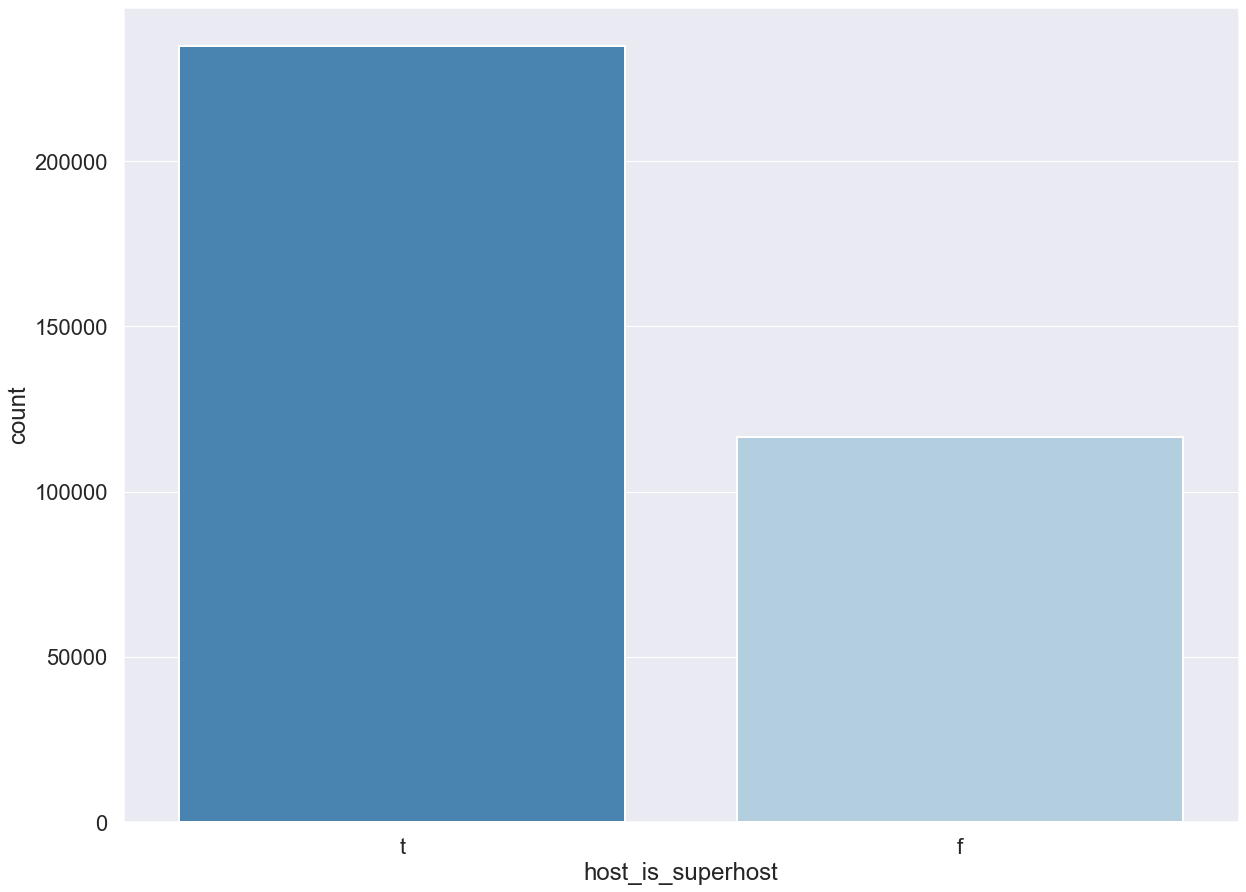

In [83]:
sns.countplot(x="host_is_superhost", data=result, palette='Blues_r');

In [19]:
# sns.countplot(x="listing_id", data=result, palette='Blues_r');

In [20]:
# sns.set(rc={'figure.figsize': (16, 5)})
# ax = sns.barplot(x = 'host_is_superhost', y = 'neighbourhood_cleansed', hue = 'number_of_reviews', data = result,
#                  palette ='plasma_r', ci = False)
# # result.loc[result[neighbourhood_cleansed] == 'St. Claude']

In [21]:
result2 = result.groupby('listing_id')
result2

In [22]:
result3 = result2.agg(np.mean)

In [23]:
# result3 = result3.reset_index()

In [71]:
result4 = pd.merge(result3, df2[['listing_id', 'host_is_superhost', 'host_location', 'host_has_profile_pic', 'host_identity_verified', 'cancellation_policy', 'host_response_rate', 'host_response_time', 'price', 'room_type', 'property_type', 'neighbourhood_cleansed']],
on = 'listing_id', validate = "m:m")
#6918 includes property with no reviews
#6250 left & inner join (only with reviews)


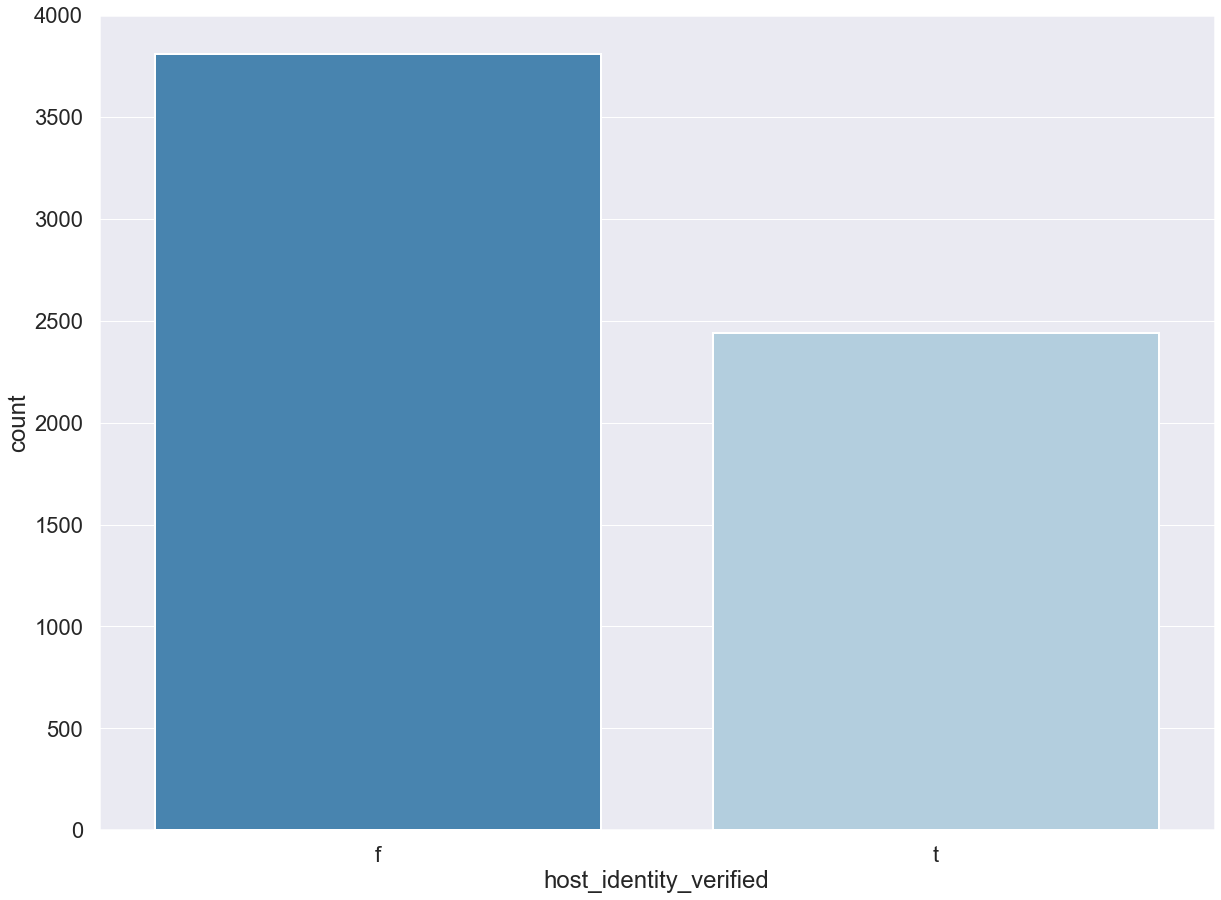

In [79]:
sns.countplot(x="host_identity_verified", data=result4, palette='Blues_r');

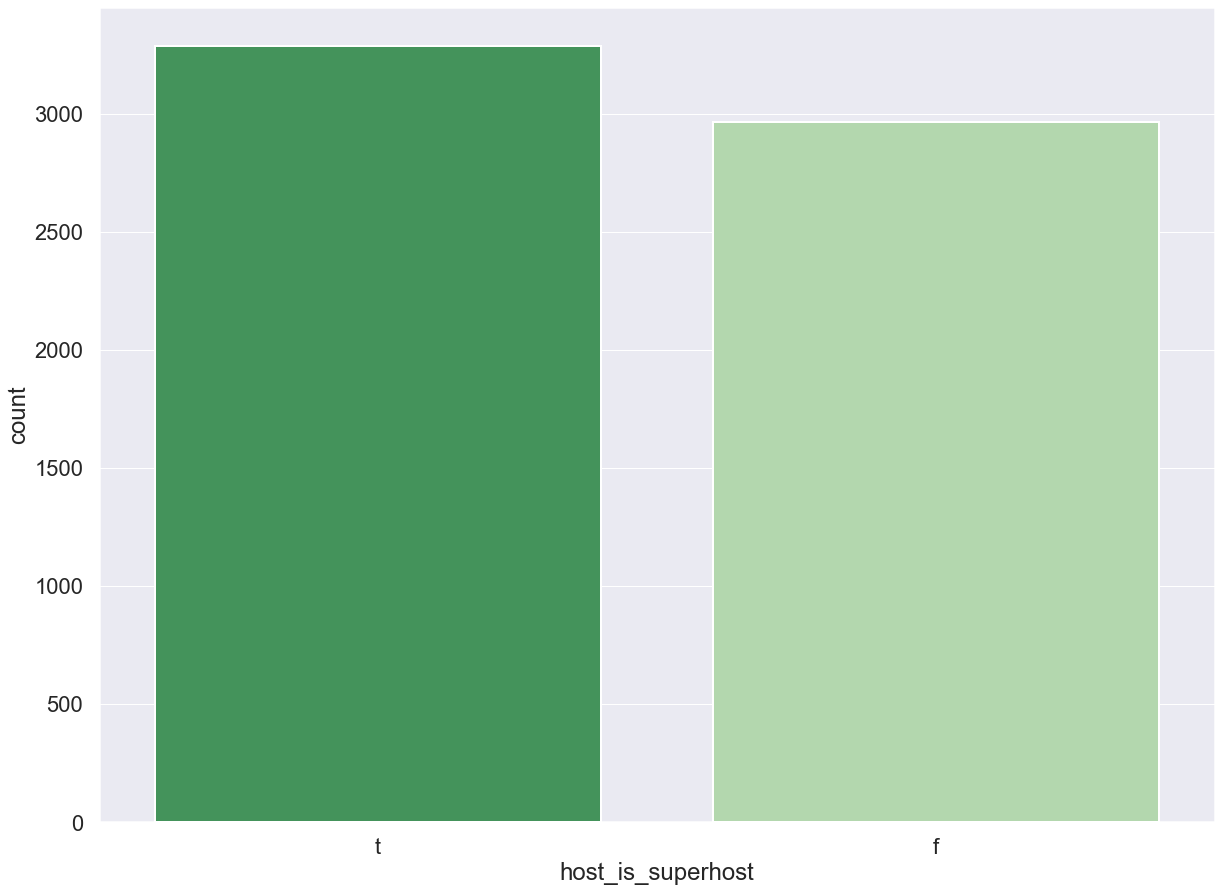

In [78]:
sns.countplot(x="host_is_superhost", data=result4, palette='Greens_r');


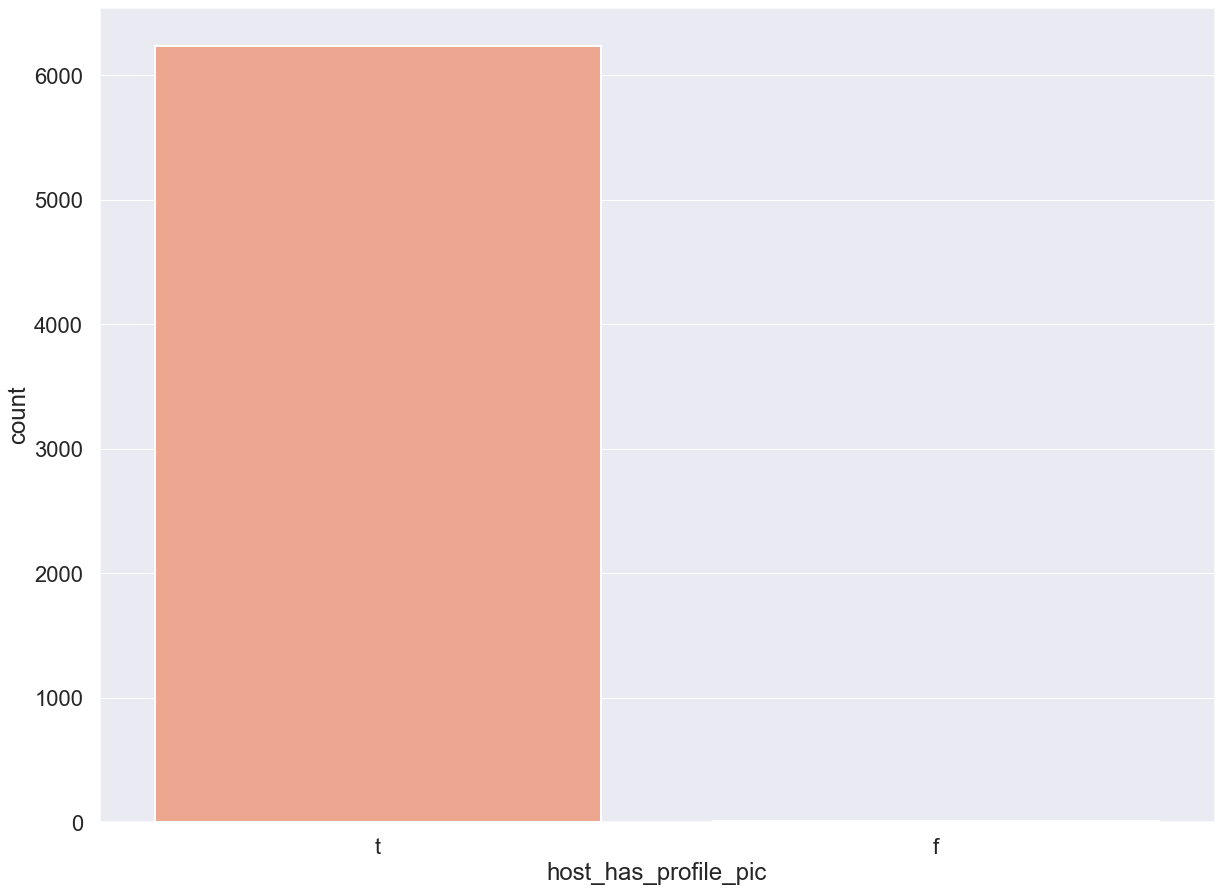

In [77]:
sns.countplot(x="host_has_profile_pic", data=result4, palette='Reds');

In [55]:
result4.drop(['reviewer_id'], axis=1, inplace = True)

In [56]:
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [57]:
result4

,listing_id,id,number_of_reviews,host_is_superhost,host_location,cancellation_policy,host_response_rate,host_response_time,price,room_type,property_type,neighbourhood_cleansed
0,10291,1.804868e+08,123.0,t,"New Orleans, Louisiana, United States",moderate,100%,within an hour,$300.00,Entire home/apt,Cottage,Navarre
1,19091,1.322482e+08,467.0,t,"New Orleans, Louisiana, United States",strict_14_with_grace_period,NaN,NaN,$100.00,Entire home/apt,Apartment,Leonidas
2,26834,1.373586e+08,256.0,t,"New Orleans, Louisiana, United States",moderate,100%,within an hour,$90.00,Entire home/apt,House,Marigny
3,66972,1.142407e+08,211.0,t,"New Orleans, Louisiana, United States",strict_14_with_grace_period,67%,within a day,$123.00,Entire home/apt,Guest suite,Bayou St. John
4,71624,1.040622e+08,226.0,t,"New Orleans, Louisiana, United States",strict_14_with_grace_period,100%,within a day,$130.00,Entire home/apt,Apartment,St. Claude
...,...,...,...,...,...,...,...,...,...,...,...,...
6245,43485693,6.272934e+08,3.0,f,"Boston, Massachusetts, United States",strict_14_with_grace_period,100%,within an hour,$99.00,Entire home/apt,House,Central City
6246,43514044,6.265419e+08,3.0,f,"New Orleans, Louisiana, United States",strict_14_with_grace_period,100%,within an hour,$99.00,Entire home/apt,House,St. Thomas Dev
6247,43524298,6.278301e+08,2.0,f,US,flexible,100%,within an hour,$150.00,Entire home/apt,House,Treme - Lafitte
6248,43544681,6.279685e+08,1.0,f,"New Orleans, Louisiana, United States",strict_14_with_grace_period,100%,within an hour,$80.00,Entire home/apt,Condominium,Central Business District


In [58]:
result4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6250 entries, 0 to 6249
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              6250 non-null   int64  
 1   id                      6250 non-null   float64
 2   number_of_reviews       6250 non-null   float64
 3   host_is_superhost       6250 non-null   object 
 4   host_location           6237 non-null   object 
 5   cancellation_policy     6250 non-null   object 
 6   host_response_rate      4897 non-null   object 
 7   host_response_time      4897 non-null   object 
 8   price                   6250 non-null   object 
 9   room_type               6250 non-null   object 
 10  property_type           6250 non-null   object 
 11  neighbourhood_cleansed  6250 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 634.8+ KB


In [59]:
result4.to_csv('results4merge.csv')

In [60]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351588 entries, 0 to 351587
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     351588 non-null  int64 
 1   id             351588 non-null  int64 
 2   date           351588 non-null  object
 3   reviewer_id    351588 non-null  int64 
 4   reviewer_name  351588 non-null  object
 5   comments       351411 non-null  object
dtypes: int64(3), object(3)
memory usage: 16.1+ MB


In [61]:
result4['price'] = result4['price'].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))

In [62]:
result4['price']= result4['price'].str.replace(',', '')

In [63]:
result4['price'] = result4['price'].astype('float64')

In [64]:
result4.price

0       300.0
1       100.0
2        90.0
3       123.0
4       130.0
        ...  
6245     99.0
6246     99.0
6247    150.0
6248     80.0
6249     99.0
Name: price, Length: 6250, dtype: float64

In [65]:
result4['host_response_rate']= result4['host_response_rate'].str.replace('%', '')

In [66]:
result4['host_response_rate'] = result4['host_response_rate'].astype('float64')

In [67]:
result4.host_response_rate

0       100.0
1         NaN
2       100.0
3        67.0
4       100.0
        ...  
6245    100.0
6246    100.0
6247    100.0
6248    100.0
6249    100.0
Name: host_response_rate, Length: 6250, dtype: float64

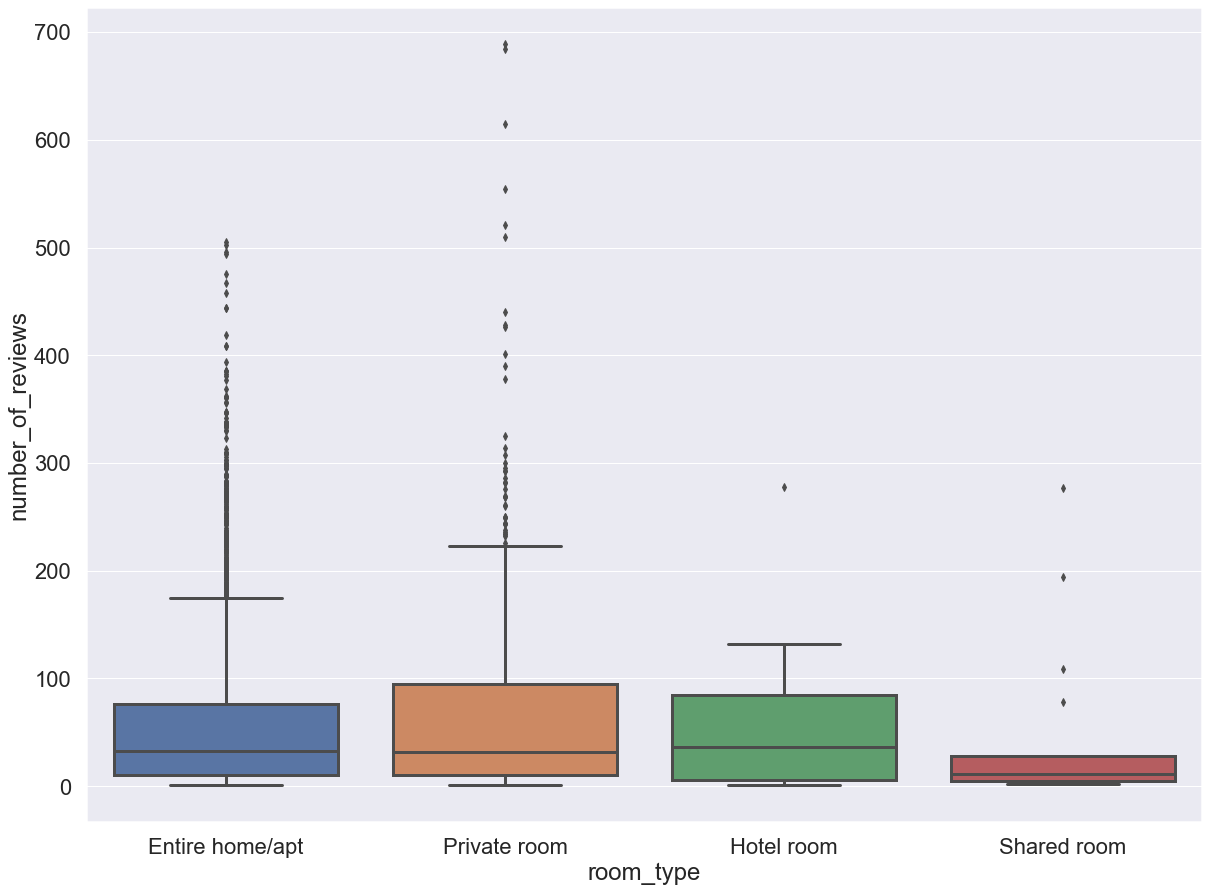

In [68]:
# sns.set(rc={'figure.figsize': (20,15)})
# sns.set_context("poster", font_scale = 1.0, rc={"grid.linewidth": 1.0})
# ax = sns.boxplot(x = 'host_response_time', y = 'price', data = result4)
sns.set(rc={'figure.figsize': (20,15)})
sns.set_context("poster", font_scale = 1.0, rc={"grid.linewidth": 1.0})
ax = sns.boxplot(x = 'room_type', y = 'number_of_reviews', data = result4)

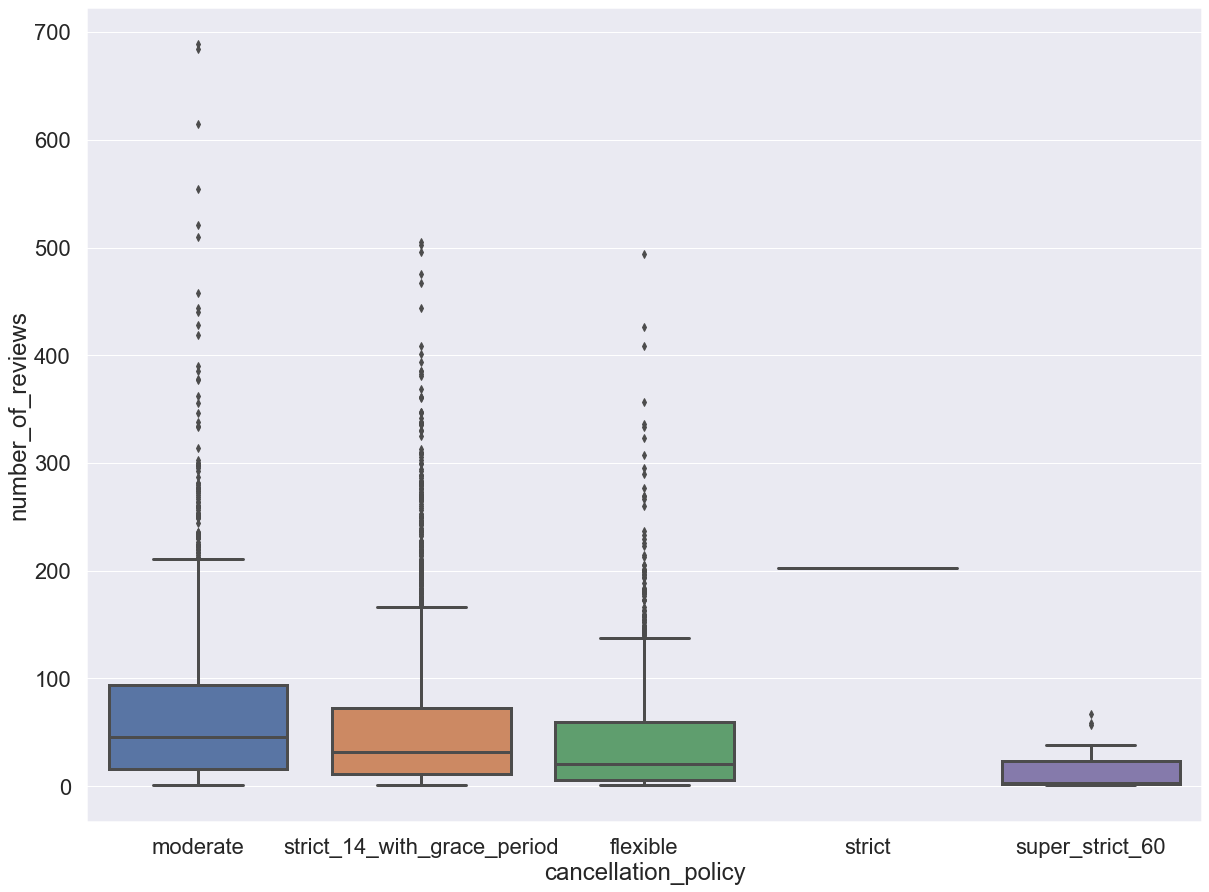

In [70]:
sns.set(rc={'figure.figsize': (20,15)})
sns.set_context("poster", font_scale = 1.0, rc={"grid.linewidth": 1.0})
ax = sns.boxplot(x = 'cancellation_policy', y = 'number_of_reviews', data = result4)

In [84]:
# ax = sns.scatterplot(x = "host_response_time", y = "number_of_reviews", data = result4, color = 'green', marker = 'p')
# ax = sns.lmplot(x = "host_response_time", y = "number_of_reviews", data = result4, height = 8, aspect = 1)

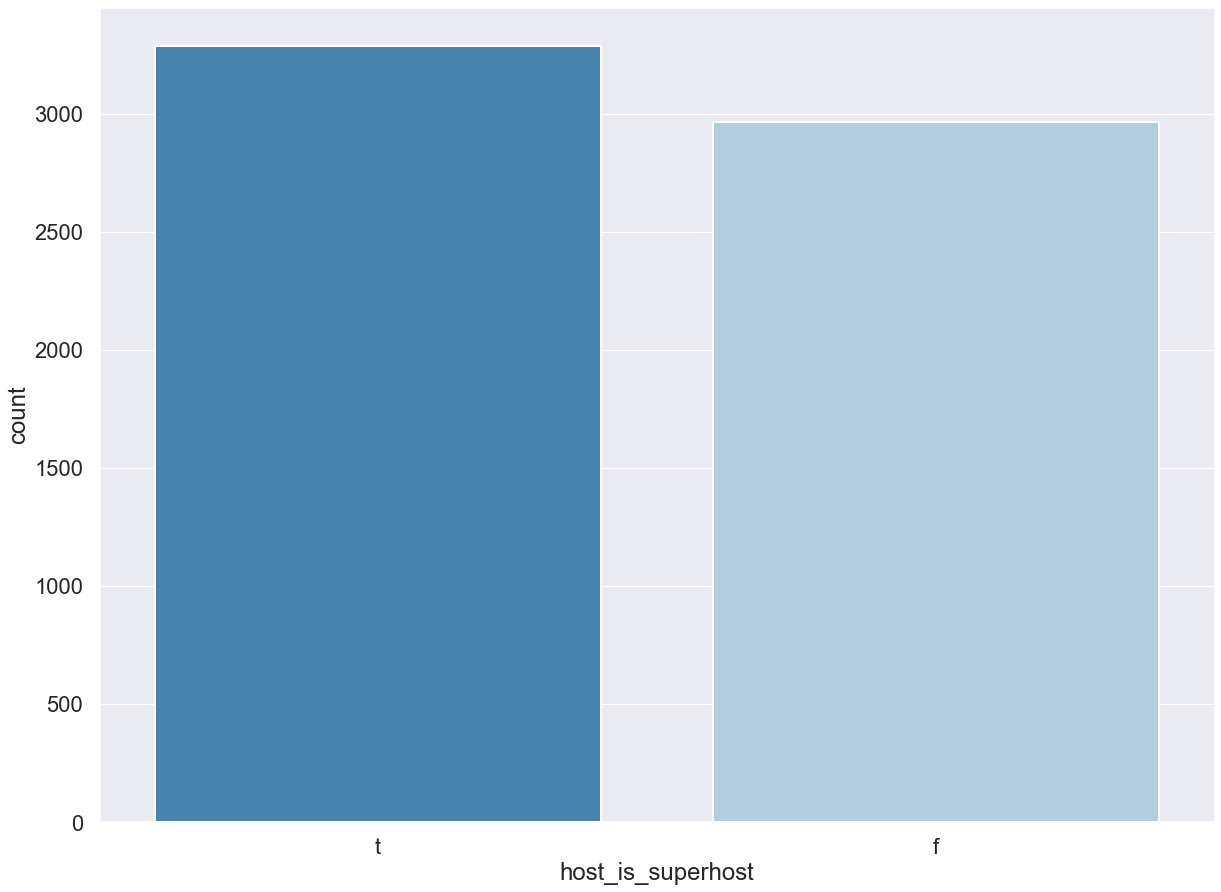

In [85]:
sns.countplot(x="host_is_superhost", data=result4, palette='Blues_r');

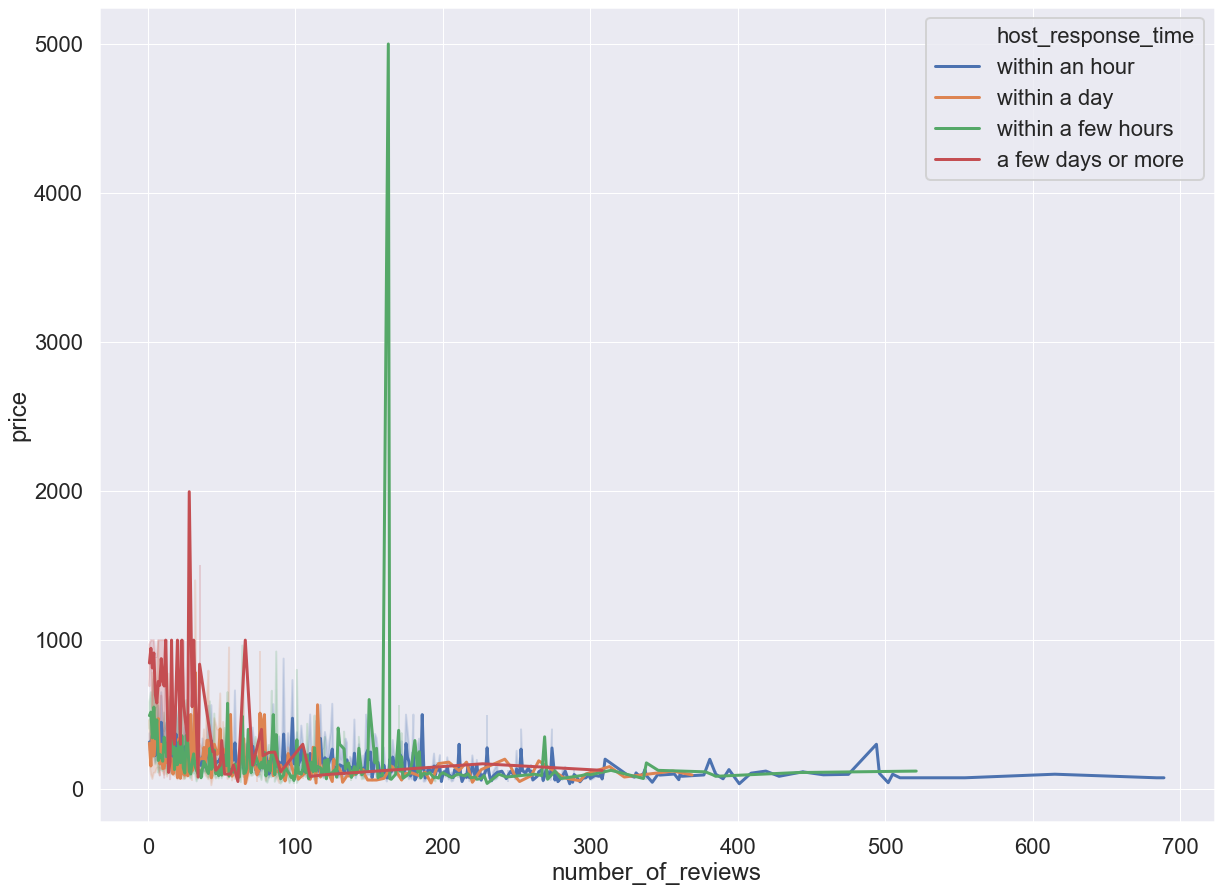

In [87]:
ax = sns.lineplot(x = 'number_of_reviews', y = 'price', data = result4, hue = 'host_response_time')

In [ ]:
sns.set_style("whitegrid")
ax = sns.scatterplot(x = "Vulnerability Score", y = "Percentage of International Students", data = df, color = 'green', marker = 'p')
ax = sns.lmplot(x = "Vulnerability Score", y = "Percentage of International Students", data = df, height = 8, aspect = 1)